In [1]:
from tools import *
%matplotlib inline

# Algorithme du perceptron

Ce TD est consacré à l'étude du perceptron. 
Cet algorithme a une longue histoire et est la base des réseaux de neurones. Il peut être vu comme une descente du gradient sur un coût particulier, le **hinge loss**, même si historiquement son inspiration est de nature biologique.

## Principe

On se place dans le cadre de la classification binaire : on considère deux labels, $Y=\{-1/+1\}$, et un ensemble de données $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times Y$. 
On cherche une fonction $f$ qui permette de **généraliser** l'ensemble des données et de faire le moins d'erreurs sur l'ensemble disponible. Nous nous plaçons toujours dans le cadre linéaire - $f$ est en fait paramétrisée par un vecteur $w$ dit de poids, $f_w(x)= <w,x> +w_0= \sum_i w_i x_i+w_0$ , et la classification est faite  en considérant le signe de $f_w(x)$ : le label prédit par $f$ pour $x$ est $sign(f_w(x))$.

Le coût qui nous intéresse en classification est l'erreur $0/1$, qui compte une erreur lorsque le label prédit est différent de l'attendu : $l(f_w(x),y)=\mathbf{1}_{sign(f_w(x))\not = y}$, l'objectif étant de trouver la fonction - le paramètrage $w$ - qui minimise ce coût sur l'ensemble des données (la fonction qui fait le moins d'erreurs, cf minimisation du risque empirique). 
Cependant ce coût est difficile à optimiser (pourquoi ?). 
Afin de pouvoir optimiser le paramètre $w$, on étudie un coût appelé dans le cadre général *hinge loss* : $l_\alpha(f_w(x),y)= max(0,\alpha-y f_w(x))$.
Dans le cas du perceptron, on prend $\alpha = 0$.

L'algorithme du perceptron est le suivant :

- Choisir $w_0$ au hasard
- Tant que non convergence
    * mise à jour de $w_t$ :
      $w_{t+1} = w_t +\epsilon \sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $



1. En fonction de $sign(f_w(x))y$, quand une mise à jour est-elle vraiment effectuée ? Quelle signification pour l'erreur sur cet exemple $x$ ? Quel rapport entre $\nabla_w l_0(f_w(x),y)$ et la mise à jour de $w$ ? Montrez que cet algorithme revient à un algorithme de descente de gradient.

2. Complétez le code ci-dessous : codez une fonction `hinge(w,data,y,alpha=0)` qui renvoie l'erreur hinge moyenne pour un vecteur de poids `w`, une matrice d'exemples `data`, un vecteur de label `y` et un paramètre $\alpha$. Codez une fonction `hinge_grad(w,data,y,alpha=0)` qui renvoie le gradient moyen pour les mêmes paramètres.
 

### Notes

Dans le code suivant, nous definissons la fonction coût et son gradient. Pour ceci, nous transformons les vecteurs de sorte qu'on puisse opérer dessus (n'avoir que des vecteurs colonnes ou que des vecteurs lignes). Puis à l'aide de ses vecteurs, nous calculons la fonction coût grâce à une moyenne sur les différents élements de ce vecteur. Le vecteur est calculé après la demonstration plus bas. Nous utilisons le même raisonnement pour le gradient.

In [2]:
def hinge(w,data,y,alpha=0):
    if len(data.shape)==1:
        data=data.reshape(1,data.shape[0]) ##colum vector to lign vector
    if len(w.shape)==1:
        w=w.reshape(1,w.shape[0])
    if len(y.shape)==1:
        y=y.reshape(y.shape[0],1)
    return np.mean(np.maximum(0,-y*(data.dot(np.transpose(w)))))

def hinge_grad(w,data,y,alpha=0):
    if len(data.shape)==1:
        data=data.reshape(1,data.shape[0])
    if len(w.shape)==1:
        w=w.reshape(1,w.shape[0])
    if len(y.shape)==1:
        y=y.reshape(y.shape[0],1)
    return np.mean(-(y*data)*(-y*data.dot(np.transpose(w))>0),axis=0)
    

w = np.random.random((1,3))
data = np.random.random((100,3))
y = np.random.randint(0,2,size = (100,1))*2-1

#### doit retourner un scalaire
print (hinge(w,data,y), hinge(w,data[0],y[0]), hinge(w,data[0,:],y[0]))
### doit retourner un vecteur de taille (w.shape[1],)
print (hinge_grad(w,data,y),hinge_grad(w,data[0],y[0]),hinge_grad(w,data[0,:],y[0]))

0.573085377601 0.0 0.0
[ 0.24576942  0.29093285  0.24952809] [ 0.  0.  0.] [ 0.  0.  0.]


### Notes

La mise à jour de l'algorithme du perceptron (mise à jour semblable à celle d'une descente de gradient) est effectuée lorsque $sign(f_w(x))\not = y$. Cela signifie, en effet, que la prédiction réalisé par l'algorithme est mauvaise. La classification est mauvaise. Effectviement, y=-1 ou 1 ie positif ou negatif, la prédiction realisé est donc pertinente selon son signe. Si la prédiction est bonne, cela signifique que $y$ et $f_w(x)$ ont le meme signe ie classifié dans le meme groupe. Donc la mise à jour est effectué uniquement losque $f_w(x)$ et y sont de signes contraires ie lorsque $sign(f_w(x)y)<0$. L'erreur est donc $l(f_w(x),y)=\mathbf{1}_{sign(f_w(x)y)<0}$ . L'erreur hinge calculé ici est une erreur empirique. Nous effectuons ici des experiences et nous calculons leurs erreurs par rapport aux labels des jeux de données



$$f_w(x)= \sum_i w_i x_i+w_0$$

$$l(f_w(x),y)=\mathbf{1}_{sign(f_w(x))\not y}$$

->$$l(f_w(x),y)=\mathbf{1}_{sign(f_w(x)y)<0}$$

-> $$w_{t+1} = w_t +\epsilon \sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $$

<b>Demonstration </b>: 

-> $\nabla_w l(f_w(x),y)=\sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0}$

->$\nabla_w l_0(f_w(x),y)=\nabla_w(max(0,-yf_w(x)))=\nabla_w(max(0,-y <w,x>) ) $

- Si $-y<w,x>>0$, ie MAJ,

$\nabla_w l_0(f_w(x),y)=\nabla_w(-y <w,x>)=- \sum yx$

- Si $-y<w,x><0$, ie non MAJ,

$\nabla_w l_0(f_w(x),y)=0$ 

d'où

$\nabla_w l_0(f_w(x),y)=-\sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $

#### Erreur hinge

La manière dont est calculée l'erreur hinge permet de comprendre que cette dernière est la distance à la frontiere dans le cas où le point est mal classé et 0 si le point est bien clasé. Le vecteur de poids w représente les coefficients de l'hyperplan frontière. Il est donc interessant par la suite de tracer la frontière de decision pour visualiser les points qui sont mal classées et leur distance par rapport à cette frontière pour comprendre comment est calculer l'erreur hinge.

### Perceptron

Le code suivant est la classe pour le perceptron avec ses différents paramètres

- le paramètre `eps` représente le pas d'apprentissage $\epsilon$;
- le paramètre `max_iter` le nombre d'itérations;
- la méthode `fit(data,y)` permet d'entraîner le perceptron sur les données en paramètres;
- la méthode `predict(data)` renvoie les labels prédits sur les données. On utilise pour ceci la démonstration précédente avec le signe de la prédiction, pour que la prédiciton est le m^me signe que y. On utilise également des transformations en ligne ou colonne pour pouvoir réaliser des opérations sur les vecteurs;
- la méthode `score(data,y)` renvoie le pourcentage de bonnes classifications en prédiction pour les données `data` par rapport aux labels  `y`. Pour ceci, on utilise l'indicatrice qui vérifie si la prédiction et le label y ont le même signe. Le score est un pourcentage de reussite. Il est donc de 1, lorsque toutes les prédictions sont bonnes. Ce score est réalisé de manière similaire aux opérations précédentes, ie avec la moyenne sur un vecteur.
- le paramètre `project` permet de complexifier la frontière (linéaire, polynomial ou gaussien)

In [22]:
class Perceptron:
    def __init__(self,max_iter = 1000,eps=1e-3,proj = None):
        self.max_iter = max_iter
        self.eps = eps
        self.project = proj

    def fit(self,data,y):
        if self.project:
            data = self.project(data)
        self.w = np.random.random((1,data.shape[1]))
        self.hist_w  = np.zeros((self.max_iter,data.shape[1]))
        self.hist_f = np.zeros((self.max_iter,1))
        self.i=0
        while self.i < self.max_iter :
            self.w = self.w -self.eps*hinge_grad(self.w,data,y)
            self.hist_w[self.i]=self.w
            self.hist_f[self.i]=hinge(self.w,data,y)
            if self.i % 100==0: print (self.i,self.hist_f[self.i])
            self.i+=1

    def predict(self,data):
        if self.project:
            data = self.project(data)
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        return np.sign(data.dot(np.transpose(self.w)))
    
    def score(self,data,y):
        if self.project:
            data = self.project(data)
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        if len(y.shape)==1:
            y=y.reshape(y.shape[0],1)
        return np.mean((y*data.dot(np.transpose(self.w))>0))
        

## Expérimentations  sur des données artificielles 2d
Le code suivant  permet de générer 3 types de données artificielles 2d (paramètre `data_type`). La fonction `plot_data` permet de tracer un graphe des données et `plot_frontiere` la frontière de décision pour une fonction de décision passée en paramètre.


data_type = 0 : mélange de deux gaussiennes

data_type = 1 : mélange de quatre gaussiennes

data_type = 2 : échequier

In [4]:
def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,eps=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param eps: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
        #melange de 2 gaussiennes
        xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),int(nbex/2))
        xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),int(nbex/2))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(int(nbex/2)),-np.ones(int(nbex/2))))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),int(nbex/4)),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),int(nbex/4))))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),int(nbex/4)),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),int(nbex/4))))     
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(int(nbex/2)),-np.ones(int(nbex/2))))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,eps,nbex)
    data[:,1]+=np.random.normal(0,eps,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y

def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    cols,marks = ["red", "green", "blue", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1],marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])



def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y


def plot_frontiere(data,f,step=20):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x,y=make_grid(data=data,step=step)
    plt.contourf(x,y,f(grid).reshape(x.shape),colors=('gray','blue'),levels=[-1,0,1])


### Mélange de deux gaussiennes

Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).
Nous allons essayer trois valeurs de epsilon pour voir si la séparation est possible. Objectivement, la séparation entre deux gaussiennes devrait être entièrement possible si elles ont des ecarts types pas trop élévés.
On constate ici que plus epsilon est petit, moins les gaussiennes sont étendues sur le graphique donc plus la séparation est possible car elles ne sont pas centrées au même point.
Dans le dernier cas (où elles sont plus répandues), quelques points sont du mauvais côté de la frontière de décision. Ce sont ces points qui diminuent le score. Plus ils sont loins de la frontière de décision, plus leur poids dans la descente du score est important.
Dans le cas où espilon est égal à 0,1 avec deux gausiennes, les données sont parfaitement separables. Dans le cas où espilon est égal à 0,5 avec deux gausiennes, les données sont quasiment entierement séparables (993/1000).

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]
1.0


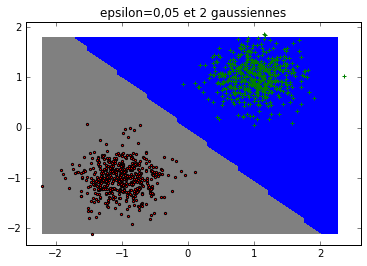

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]
1.0


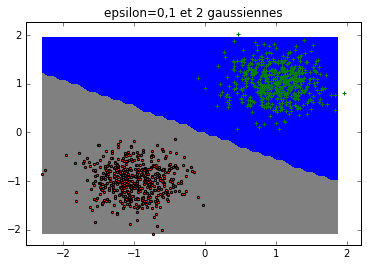

0 [ 0.00045075]
100 [ 0.00025892]
200 [ 0.00017992]
300 [ 0.00010097]
400 [  2.24041715e-05]
500 [ 0.00038656]
600 [  4.00478680e-05]
700 [  6.73583804e-05]
800 [ 0.00010721]
900 [  3.56215114e-06]
0.994


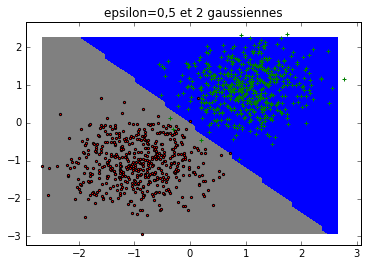

0 [ 0.04824648]
100 [ 0.00880367]
200 [ 0.06645695]
300 [ 0.02012515]
400 [ 0.06373913]
500 [ 0.03576043]
600 [ 0.00944613]
700 [ 0.0266246]
800 [ 0.06642892]
900 [ 0.00485065]
0.889


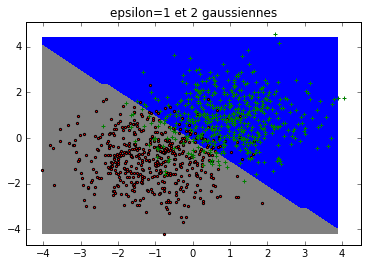

In [5]:
### Generer et tracer des donnees 
datax,datay = gen_arti(centerx=1,centery=1,data_type=0,nbex=1000,eps=0.05)
p = Perceptron(eps=5e-2,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,05 et 2 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et 2 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,5 et 2 gaussiennes")
plt.show()

datax,datay = gen_arti(data_type=0,nbex=1000,eps=1)
p = Perceptron(eps=1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=1 et 2 gaussiennes")
plt.show()

Ici, nous allons décentré les gaussiennes, il devient donc impossible de les séparer et nous obtenons le score d'un classifieur classique ie 50%.

0 [ 0.05274568]
100 [ 0.00053012]
200 [ 0.00041951]
300 [ 0.00041301]
400 [ 0.00040953]
500 [ 0.00040718]
600 [ 0.00040521]
700 [ 0.00040472]
800 [ 0.00040542]
900 [ 0.00040524]
0.505


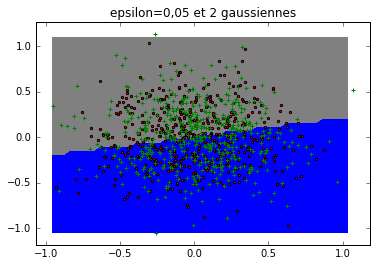

In [6]:
### Generer et tracer des donnees 
datax,datay = gen_arti(centerx=0,centery=1,data_type=0,nbex=1000,eps=0.05)
p = Perceptron(eps=5e-2,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,05 et 2 gaussiennes")
plt.show()

### Mélange de 4 gaussiennes

Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).
Nous allons essayer deux valeurs de epsilon pour voir si la séparation est possible. Objectivement, la séparation entre quatres gaussiennes devrait être impossible, nous devrions donc obtenir un score de 50% comme celui d'un classifieur classique. Si les gaussiennes sont bien reparties, nous pouvons obtenir ce score de 50%. Si les gaussiennes sont étendus avec des ecarts types importants, nous devrions avoir un score plus faible.
On constate ici que plus epsilon est petit, moins les gaussiennes sont étendues sur le graphique donc plus la séparation est possible.

0 [ 0.23985986]
100 [ 0.01381294]
200 [ 0.0033319]
300 [ 0.01635124]
400 [ 0.02439298]
500 [ 0.02310642]
600 [ 0.00278212]
700 [ 0.01732845]
800 [ 0.00223792]
900 [ 0.00955748]
0.499


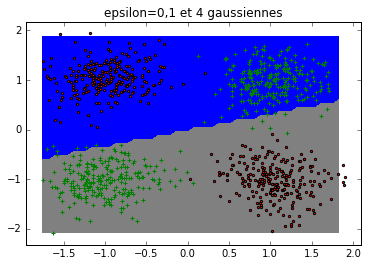

0 [ 0.01842954]
100 [ 0.09709704]
200 [ 0.04345715]
300 [ 0.12253038]
400 [ 0.00272607]
500 [ 0.09853523]
600 [ 0.05495157]
700 [ 0.03246481]
800 [ 0.10504655]
900 [ 0.01803345]
0.496


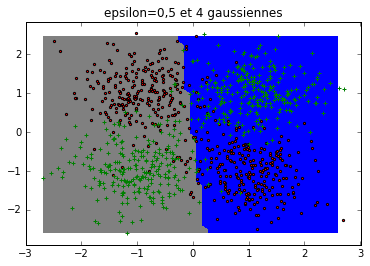

In [7]:
### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=1,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et 4 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=1,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,5 et 4 gaussiennes")
plt.show()

### Echequier

Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).
Nous allons essayer une valeur de epsilon pour voir si la séparation est possible. La séparation avec un échequier est impossible, si ce dernier est bien centré est bien répandu, nous obtiendrons un score d'environ 50%.
On constate ici que plus epsilon est petit, moins les gaussiennes sont étendues sur le graphique donc plus la séparation est possible.
Epsilon n'a quasiment aucune influence sur le score, les différences de score se font à cause d'un tirage aléatoire.

0 [ 0.53596938]
100 [ 0.08072844]
200 [ 0.39712126]
300 [ 0.27821372]
400 [ 0.09930215]
500 [ 0.41498081]
600 [ 0.03333632]
700 [ 0.43856543]
800 [ 0.09477634]
900 [ 0.2811717]
0.489


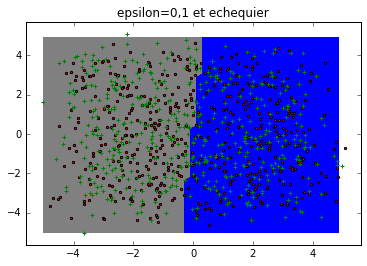

0 [ 0.75708962]
100 [ 0.0720362]
200 [ 0.07301306]
300 [ 0.07301694]
400 [ 0.07259453]
500 [ 0.07311104]
600 [ 0.07302852]
700 [ 0.0730324]
800 [ 0.07307829]
900 [ 0.07324278]
0.505


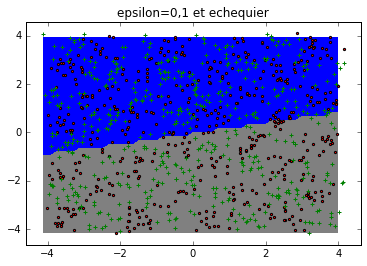

In [8]:
### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=2,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et echequier")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=2,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et echequier")
plt.show()

Données inséparables avec l'echequier



3. Essayez d'apprendre des gaussiennes non centrées. La performance est-elle bonne ? Dans le cas négatif, avez-vous pensez à implémenter le biais (le poids $w_0$) ? que représente ce biais ?


## Perceptron stochastique

On implémente ici la version stochastique du perceptron ie à chaque mise-à-jour, un exemple est tiré au hasard et la correction n'est effectuée que par rapport à cet exemple.

In [111]:
class PerceptronStochastique:
    def __init__(self,couts,max_iter = 1000,eps=1e-3):
        self.max_iter = max_iter
        self.eps = eps
        self.couts=couts
        
    def fit(self,data,y):
        self.w = np.random.random((1,data.shape[1]))
        self.hist_w  = np.zeros((self.max_iter,data.shape[1]))
        self.hist_f = np.zeros((self.max_iter,1))
        self.i=0
        while self.i < self.max_iter :
            index=np.random.randint(len(data))
            self.w = self.w -self.eps*hinge_grad(self.w,data[index],y[index])
            self.hist_w[self.i]=self.w
            self.hist_f[self.i]=hinge(self.w,data[index],y[index])
            #print("w:", self.w)
            #print("hinge:", hinge_grad(self.w, data[index], y[index]))
            self.couts.append(self.score(data,y))
            if self.i % 10000==0: 
                print (self.i,self.hist_f[self.i])
            self.i+=1
    def predict(self,data):
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        return np.sign(data.dot(np.transpose(self.w)))
    
    def score(self,data,y):
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        if len(y.shape)==1:
            y=y.reshape(y.shape[0],1)
        return np.mean((y*data.dot(np.transpose(self.w))>0))
    def moyenne(self):
        moy=np.zeros(100)
        for i in range(1,int(self.max_iter/100)):
                moy[0]+=self.couts[i]
                #print(moy[0])
        for j in range(1,100,1):
            for i in range(j*int(self.max_iter/100)+1,(j+1)*int(self.max_iter/100)):
                #print(moy[j])
                moy[j]+=self.couts[i]
            moy[j]=moy[j]/int(self.max_iter/100)
        moy[0]=moy[0]/int(self.max_iter/100)
        return moy

0 [ 0.]
10000 [ 0.]
20000 [ 0.]
30000 [ 0.]
40000 [ 0.]
50000 [ 0.]
60000 [ 0.]
70000 [ 0.]
80000 [ 0.]
90000 [ 0.]
0.994


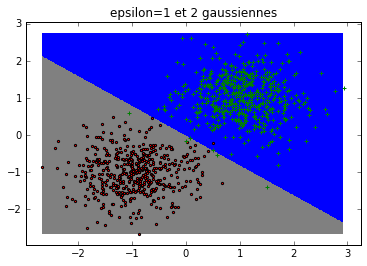

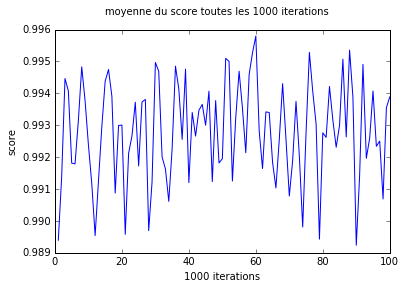

In [113]:
### Generer et tracer des donnees 
couts=[]
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.5)
p = PerceptronStochastique(couts,eps=1,max_iter=100000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,500)
plot_data(datax,datay)
plt.title("epsilon=1 et 2 gaussiennes")
plt.show()

plt.figure().suptitle('moyenne du score toutes les 1000 iterations')
plt.plot(range(1,101,1),p.moyenne())
plt.ylabel('score')
plt.xlabel('1000 iterations')
plt.show()


0 [ 0.]
0.984


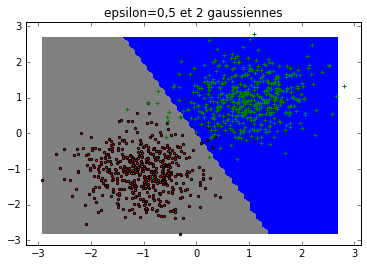

0 [ 0.]
0.901


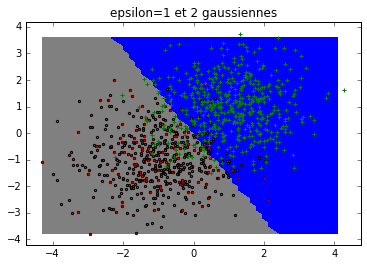

In [114]:
w = np.random.random((1,3))
data = np.random.random((100,3))
y = np.random.randint(0,2,size = (100,1))*2-1

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.5)
p = PerceptronStochastique(couts,eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,5 et 2 gaussiennes")
plt.show()


### Generer et tracer des donnees 

datax,datay = gen_arti(data_type=0,nbex=1000,eps=1)
p = PerceptronStochastique(couts,eps=1,max_iter=5000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=1 et 2 gaussiennes")
plt.show()



Le perceptron stochastique permet d'effectuler l'algorithme et la descente de gradient plus rapidement. En effet, au lieu de calculer la descente sur toutes les données, on tire aléatoirement une donnée et on effectue la mise à jour dessus. 
Ce calcul est plus imprécis qu'un Batch Gradient Descent car on approche autour du minimul local au lieu de l'atteindre directement, le score est donc logiquement légèrement plus faible mais le calcul est plus rapide. On peut donc augmenter le nombre d'itérations.
Pour vérifier la convergence du perceptron stochastique, nous pourrions calculer le coût et verifier sa valeur avant d'effectuer la mise à jour de w. On peut également toutes les 1000 itérations tracer la moyenne du coût sur ces itérations.

## Données USPS (chiffres manuscrits)

Expérimentez votre perceptron sur des données de [chiffres manuscrits à télécharger](http://webia.lip6.fr/~mapsi/uploads/Cours/2015_tme3_usps_train.txt). Chaque exemple correspond à un chiffre manuscrit sur une matrice 16x16 (description sur un vecteur de taille 256), où chaque valeur indique la luminosité du pixel. 

Le code suivant permet de charger le fichier usps est d'afficher la première image de ce fichier avec son label.

6


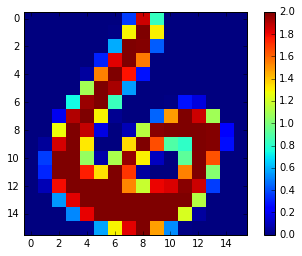

In [15]:
def  load_usps(filename):
    with open(filename ,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)
datax,y = load_usps("usps.txt")
plt.imshow(datax[0].reshape((16,16)),interpolation="nearest")
plt.colorbar()
print(y[0])

## Séparation de deux classes de chiffres

Le code suivant permet de classifier les images du fichier usps en séparant deux chiffres, ie deux classes. Ici, nous allons séparer les 6 et 9. Pour ceci nous chargons tous les 6 et 9 (toutes les images dont le label est 6 ou 9). Puis nous creéons un fichier de labels avec deux classes possibles -1 pour les 6 et +1 pour les 9.
Nous utilisons ensuite l'algorithme du perceptron, qui permet de différencier ces deux classes. Nous avons utiliser des labels -1 et +1 pour que les signes soient bien différents pour que le perceptron puisse fonctionner.
Nous constatons que le score est de 98%, donc la classification est bien réussie.

In [16]:
perc = Perceptron(eps=1e-2,max_iter=1000)

#Differencier 6 et 9
usps_6 = datax[y==6]
usps_9 = datax[y==9]
data=np.vstack((usps_6,usps_9))

label_6= -1*np.ones((len(usps_6),1))
label_9=np.ones((len(usps_9),1))
label=np.vstack((label_6,label_9))

perc.fit(data,label)
perc.score(data,label)
print("Le score est ",perc.score(data,label))

0 [ 35.3664392]
100 [ 3.03417169]
200 [ 0.41790594]
300 [ 0.18834115]
400 [ 0.13138118]
500 [ 0.09957435]
600 [ 0.08048227]
700 [ 0.06911348]
800 [ 0.05963642]
900 [ 0.05152825]
Le score est  0.983944954128


## Séparation d'une classe contre les autres. One vs All

Le code suivant permet de classifier les images du fichier usps en séparant un chiffres de tous les autres. On utilise pour ceci la méthode One vs All, ie qu'on affecte un label au chiffre choisi et un autre pour tous les autres classes reunies. Ici, nous allons séparer les 6 des autres chiffres.Nous chargons tous les 6 et tous les chiffres non 6 (toutes les images dont le label est 6 ou n'est pas 6). Puis nous creéons un fichier de labels avec deux classes possibles -1 pour les 6 et +1 pour les non 6.
Nous utilisons ensuite l'algorithme du perceptron, qui permet de différencier ces deux classes. Nous avons utiliser des labels -1 et +1 pour que les signes soient bien différents pour que le perceptron puisse fonctionner.
Nous constatons que le score est de 95%, donc la classification est bien réussie. Nous pouvons également constater que le chargement est plus long par rapport au calcul précédent car il y a plus d'images à charger.

In [17]:
perc = Perceptron(eps=1e-2,max_iter=1000)

#Differencier 6 et tout
usps_6 = datax[y==6]
usps_not6 = datax[y!=6]
data=np.vstack((usps_6,usps_not6))

label_6= -1*np.ones((len(usps_6),1))
label_not6=np.ones((len(usps_not6),1))
label=np.vstack((label_6,label_not6))

perc.fit(data,label)
perc.score(data,label)
print("Le score est ",perc.score(data,label))

0 [ 6.18403428]
100 [ 5.09150899]
200 [ 3.9989837]
300 [ 2.9064584]
400 [ 1.81393311]
500 [ 0.74219741]
600 [ 0.32886158]
700 [ 0.22057989]
800 [ 0.17247319]
900 [ 0.14805931]
Le score est  0.961870799616


### Vecteur de motifs

Nous allons ici tracer le vecteur poids obtenu apres apprentissage. En effet, la feature map (ou vecteur des motifs) a appris les pixels qui caracterisaient le 6 en leur associant une valeur négative. Nous avons séparé les 6 des autres chiffres et nous avons associé une valeur négative du poids associé au pixel caracterisant le 6.

$ label_6 = (-1) * np.ones ((len(usps_6),1)) $

On peut reconnaitre le motif d'un 6. Le motif de 6 est donc de couleur bleue significative des poids negatifs associés à ces pixels.


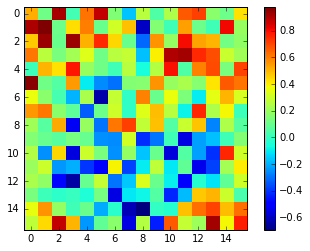

In [18]:
##Vecteur de motifs pour le 6 apres perceptron
plt.imshow(perc.w.reshape((16,16)),interpolation="nearest")
plt.colorbar()

## Extensions : linéaire... vraiment ?

Nous avons pour l'instant considérer que des séparatrices linéaires. 

1. Pourquoi à votre avis est-il utile de limiter la famille de fonctions considérée (pensez aux k-plus proches voisins) ? En quoi est-ce limitant ?

Une façon d'augmenter l'expressivité des fonctions est de transformer l'espace d'entrée par des projections. Soit $x \in \mathbb{R}^2$, et $\phi(x)=(1,x_1,x_2,x_1x_2,x_1^2,x_2^2)$ la projection polynomiale d'ordre 2.
Quelle est la forme des frontières de décision de la fonction de décision $f^\phi_\mathbf{w}(\mathbf{x})=f_\mathbf{w}(\phi(\mathbf{x}))$ ? 

1. Que doit-on changer pour adapter la descente du gradient, que ce soit dans le cas de la régression linéaire ou du perceptron ? Peut-on généraliser à des degrés supérieurs ?



Testez sur les données de type 2. 


Soit $B=\{x^1,x^2,\cdots,x^B\}$ un ensemble de points de même dimension que l'entrée, et $\phi_B(x)=(k(x,x^1),k(x,x^2),\cdots,k(x,x^B))$ la projection gaussienne sur $B$ de $x$, $k(x,x')=Ke^{\frac{\|x-x'\|^2}{\sigma^2}}$.

1. Que doit-on changer pour adapter l'algorithme du perceptron ?  Implémentez.

2. Que veut-dire un poids positif devant une composante  de cette projection ? un poids négatif  ? un poids nul ? 
3. Que se passe-t-il si beaucoup de poids sont non nuls ? nuls ? Dans quel cas la frontière est la plus complexe ? la moins ?
4. En vous inspirant de la notion de ridge regression vu en cours, que proposez vous pour régulariser ?


### Projection polynomiale et perceptron

La fonction `proj_poly2(data)`  renvoie la projection polynomiale de degré 2 de la matrice d'exemples data.
Cette fonction est ensuite utilisée pour apprendre un perecptron avec une projection polynomiale. On utilise des données générées artificiellement.

In [19]:
def proj_poly2(data):
    n = data.shape[0]
    return np.hstack((np.ones((n,1)), data, np.multiply(to_col(data[:,0]),to_col(data[:,1])), np.square(to_col(data[:,0])), np.square(to_col(data[:,1]))))

0 [ 0.30292106]
100 [ 0.00217515]
200 [ 0.00049455]
300 [ 0.00017459]
400 [  9.68413749e-05]
500 [  8.12099396e-05]
600 [  6.55785042e-05]
700 [  4.99470689e-05]
800 [  3.43156335e-05]
900 [  1.86841982e-05]
Le score est : 0.999


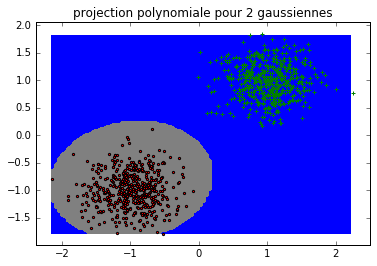

0 [ 0.78721643]
100 [ 0.67984768]
200 [ 0.57266195]
300 [ 0.47259047]
400 [ 0.38370923]
500 [ 0.30610973]
600 [ 0.23785917]
700 [ 0.17957211]
800 [ 0.12885962]
900 [ 0.08801994]
1000 [ 0.06233723]
1100 [ 0.04750962]
1200 [ 0.03823014]
1300 [ 0.03186965]
1400 [ 0.0273148]
1500 [ 0.02397184]
1600 [ 0.02152682]
1700 [ 0.01942905]
1800 [ 0.01772022]
1900 [ 0.01633165]
2000 [ 0.01520726]
2100 [ 0.01425616]
2200 [ 0.01344793]
2300 [ 0.0127029]
2400 [ 0.01199916]
2500 [ 0.01136605]
2600 [ 0.0108002]
2700 [ 0.01029676]
2800 [ 0.00979837]
2900 [ 0.0093498]
3000 [ 0.00897332]
3100 [ 0.00863966]
3200 [ 0.00831563]
3300 [ 0.00803777]
3400 [ 0.00776153]
3500 [ 0.00749123]
3600 [ 0.00726469]
3700 [ 0.00706392]
3800 [ 0.00687089]
3900 [ 0.00670137]
4000 [ 0.00655699]
4100 [ 0.00641352]
4200 [ 0.00627444]
4300 [ 0.00614366]
4400 [ 0.0060165]
4500 [ 0.00589534]
4600 [ 0.00577588]
4700 [ 0.00565952]
4800 [ 0.00554315]
4900 [ 0.00542679]
0.969


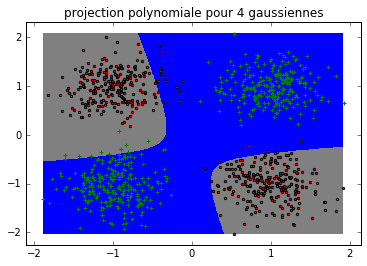

0 [ 2.66272847]
100 [ 1.72842013]
200 [ 1.26616123]
300 [ 1.11612857]
400 [ 1.00496631]
500 [ 0.89654962]
600 [ 0.78912091]
700 [ 0.68364403]
800 [ 0.58160122]
900 [ 0.48222226]
0.479


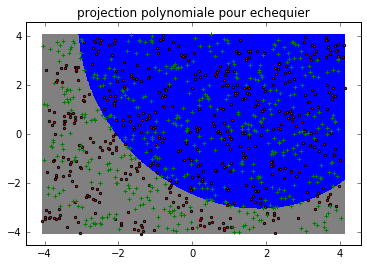

In [119]:
#apprentissage avec projection polynomiale pour 2 gaussiennes
datax,datay=gen_arti(data_type=0,nbex=1000,eps=0.1)
#projection=proj_poly2(datax)
perceptron_ext=Perceptron(max_iter=1000,eps=1e-2, proj = proj_poly2)
perceptron_ext.fit(datax,datay)
print("Le score est :", perceptron_ext.score(datax,datay))
plot_frontiere(datax,perceptron_ext.predict,100)
plt.title("projection polynomiale pour 2 gaussiennes")
plot_data(datax,datay)
plt.show()


# apprentissage avec projection polynomiale pour 4 gaussiennes
datax,datay = gen_arti(centerx = 1, data_type=1,nbex=1000,eps=0.1)
#df = proj_poly2(datax)
p = Perceptron(eps=1e-3,max_iter=5000, proj = proj_poly2)
p.fit(datax,datay)
print(p.score(datax,datay))
plot_frontiere(datax,p.predict,500)
plot_data(datax,datay)
plt.title("projection polynomiale pour 4 gaussiennes")
plt.show()

# apprentissage avec projection polynomiale pour 4 gaussiennes
datax,datay = gen_arti(centerx = 1, data_type=2,nbex=1000,eps=0.1)
#df = proj_poly2(datax)
p = Perceptron(eps=1e-3,max_iter=1000, proj = proj_poly2)
p.fit(datax,datay)
print(p.score(datax,datay))
plot_frontiere(datax,p.predict,500)
plot_data(datax,datay)
plt.title("projection polynomiale pour echequier")
plt.show()


#### Remarques
Nous avons donc tracé ici les frontières de decision avec la projection polynomiale pour 2 et 4 gaussiennes et l'echequier. Nous augmentons donc la complexité et l'ordre par rapport au classifieur linéaire précédent. 
Pour deux gaussiennes, le perceptron linéaire donnait un score de 100% donc il n'etait pas necessaire de faire une projection polynomiale mais nous avons voulu tout de même essayer. Nous constatons que le score est très proche de 1 mais n'est pas très réaliste, en effet, l'ajout de complexité peut créer du surapprentissage et donc peut empecher la généralisation lors des tests ultérieurs. Même si les resultats sont assez bons, il ne parait pas optimal d'utiliser des projections polynomiales pour deux gaussiennes.
Au contraire pour les 4 gaussiennes, avec le perceptron linéaire nous n'avions pas un score supérieur à celui d'un classifieur classique. Avec la projection polynomiale, nous arrivons à séparer les données des 4 gaussiennes avec un score assez bon (96%). Dans ce cas, la projection est donc utile et performante.
Malheureusement, comme on pouvait s'y atteindre pour l'echequier nous obtenons toujours des resultats semblables à ceux d'un classifieur classique (ie autour de 50%). L'ajout de la projection polynomiale n'a pas suffit pour séparer ces données

### Projection gaussienne et perceptron

La fonction `proj_poly3(data)`  renvoie la projection gaussienne de la matrice d'exemples data.
Cette fonction est ensuite utilisée pour apprendre un perecptron avec une projection polynomiale. On utilise des données générées artificiellement.

In [42]:
from numpy import linalg
K = 1
sigma = 0.5
def similarity(data,X):
    return K*np.exp(-np.square(np.linalg.norm(data-X, axis =1))/sigma**2)

In [45]:
nb = 300
B = np.reshape(np.random.uniform(-4,4,2*nb),(nb,2))

def proj_poly3(data):
    L = [k(data, x) for x in B]
    df = np.array(L)
    return df.T

0 [ 0.78108639]
100 [ 0.67070978]
200 [ 0.56033316]
300 [ 0.45072335]
400 [ 0.34793377]
500 [ 0.26381784]
600 [ 0.20030907]
700 [ 0.15277632]
800 [ 0.11607109]
900 [ 0.08951713]
1000 [ 0.07049936]
1100 [ 0.05784132]
1200 [ 0.04845196]
1300 [ 0.04069117]
1400 [ 0.03427137]
1500 [ 0.02892758]
1600 [ 0.0244268]
1700 [ 0.02068006]
1800 [ 0.01754509]
1900 [ 0.01528445]
2000 [ 0.01367344]
2100 [ 0.0123505]
2200 [ 0.01125684]
2300 [ 0.01026353]
2400 [ 0.00945074]
2500 [ 0.00883519]
2600 [ 0.00828451]
2700 [ 0.00777844]
2800 [ 0.00731861]
2900 [ 0.00693]
3000 [ 0.00657798]
3100 [ 0.00625723]
3200 [ 0.00596425]
3300 [ 0.00569039]
3400 [ 0.00545699]
3500 [ 0.00524473]
3600 [ 0.00505134]
3700 [ 0.00487035]
3800 [ 0.00471337]
3900 [ 0.00457101]
4000 [ 0.00443459]
4100 [ 0.00430032]
4200 [ 0.00417897]
4300 [ 0.0040695]
4400 [ 0.00396246]
4500 [ 0.00385986]
4600 [ 0.00376199]
4700 [ 0.00367419]
4800 [ 0.00360051]
4900 [ 0.00353005]
Le score est : 0.851


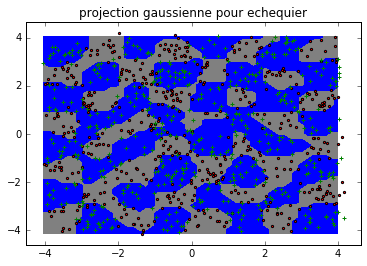

In [121]:
# apprentissage avec projection gaussienne
datax,datay = gen_arti(centerx = 1, data_type=2,nbex= 1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=5000, proj = proj_poly3)
p.fit(datax,datay)
print("Le score est :",p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title('projection gaussienne pour echequier')
plt.show()

0 [ 0.65728032]
100 [ 0.09269122]
200 [ 0.0471244]
300 [ 0.03280296]
400 [ 0.02488385]
500 [ 0.01960785]
600 [ 0.01611805]
700 [ 0.01392087]
800 [ 0.01206228]
900 [ 0.01069173]
Le score est : 0.976


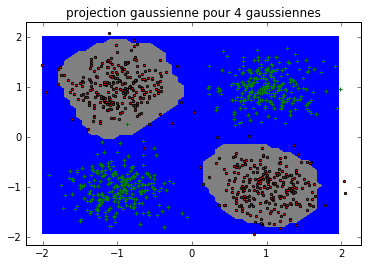

0 [ 0.96861167]
100 [ 0.04326517]
200 [ 0.01890695]
300 [ 0.01196628]
400 [ 0.00891008]
500 [ 0.00733175]
600 [ 0.00625447]
700 [ 0.00552263]
800 [ 0.00483731]
900 [ 0.00415198]
Le score est : 0.988


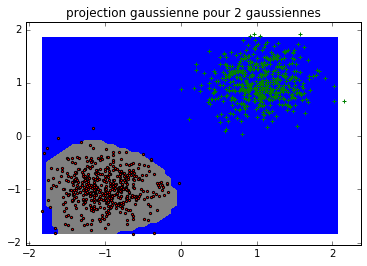

In [124]:
# apprentissage avec projection gaussienne

datax,datay = gen_arti(centerx = 1, data_type=1,nbex= 1000,eps=0.1)
df = proj_poly3(datax)
p = Perceptron(eps=1e-1,max_iter=1000, proj = proj_poly3)
p.fit(datax,datay)
print("Le score est :",p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title('projection gaussienne pour 4 gaussiennes')
plt.show()

# apprentissage avec projection gaussienne

datax,datay = gen_arti(centerx = 1, data_type=0,nbex= 1000,eps=0.1)
df = proj_poly3(datax)
p = Perceptron(eps=1e-1,max_iter=1000, proj = proj_poly3)
p.fit(datax,datay)
print("Le score est :",p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title('projection gaussienne pour 2 gaussiennes')
plt.show()

#### Remarques
Nous avons donc tracé ici les frontières de decision avec la projection gaussienne pour 2 et 4 gaussiennes et l'echequier. Nous augmentons donc la complexité et l'ordre par rapport au classifieur linéaire précédent et à la projection polynomiale. 
Pour deux gaussiennes, nous obtenons un resultat similaire à la projection polynomiale : un bon score mais pas forcemeent réaliste, qui causerait surement du surapprentissaget et empecherait une généralisation.
Pour les 4 gaussiennes, nous arrivons à un résultat proche de la projection polynomiale : nous arrivons à séparer les données des 4 gaussiennes avec un score assez bon (96%) mais dans ce cas, la complexité est encore trop élévée pour ce jeu de données et la généralisation parait compliquée.
Contrairement aux résultats précédents, l'echequier peut être séparé grâce à cette projection gaussienne avec un assez bon score : 85%. 